In [3]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install -U numpy
!{sys.executable} -m pip install -U scipy
!{sys.executable} -m pip install -U matplotlib

In [6]:
# Hash utilities
import zlib
import uuid
from collections import Counter as count  
from string import printable  

# Create Hash Function
def crc32_hash_function(user_id: str) -> str:
    """Take string, even if its integer convert first to string"""
    return zlib.crc32(user_id.encode("utf-8"))

# Convert from str to hexadecimal
def to_hex(crc32encoded: str) -> hex:
    return hex(crc32encoded & 0xffffffff)

# Perform hash function to each item
def distribute(items, num_containers, hash_function = hash):  
    return count([hash_function(item) % num_containers for item in items])  

# Cli plotting
def plot(histogram):  
    for key in sorted(histogram):  
        count1 = histogram[key]  
        padding = (max(histogram.values()) - count1) * " "  
        print(f"{key:3} {'■' * count1}{padding} ({count1})")

def get_title(algorithm_name, num_bins, num_elements, num_case):
        if not num_case:
            title = f"{algorithm_name}"
        else:
            title = f"Use Case #{num_case} - {algorithm_name}"
        subtitle = f"Number of Bins: {num_bins}  Number of UUIDs: {num_elements}"
        return f"{title}\n{subtitle}"

# Quick demo
bins = 5
print(get_title(sys.hash_info.algorithm, bins, len(printable), 1))
plot(distribute(printable, num_containers=bins))  

print(get_title("crc32", bins, len(printable), 2))
plot(distribute(printable, num_containers=bins, hash_function=crc32_hash_function))  

Use Case #1 - siphash24
Number of Bins: 5  Number of UUIDs: 100
  0 ■■■■■■■■■■■■■■■■■         (17)
  1 ■■■■■■■■■■■■■■■■■■■■      (20)
  2 ■■■■■■■■■■■■■■■■■■■■■■■■■ (25)
  3 ■■■■■■■■■■■■■■■■          (16)
  4 ■■■■■■■■■■■■■■■■■■■■■■    (22)
Use Case #2 - crc32
Number of Bins: 5  Number of UUIDs: 100
  0 ■■■■■■■■■■■■■■■             (15)
  1 ■■■■■■■■■■■■■■■■■■■■        (20)
  2 ■■■■■■■■■■■■■■■■■■■         (19)
  3 ■■■■■■■■■■■■■■■■■■■■■■■■■■■ (27)
  4 ■■■■■■■■■■■■■■■■■■■         (19)


In [7]:
# Low user test case
test_cases = [
    [str(uuid.uuid4().int) for i in range(10)],   
    [str(uuid.uuid4().int) for i in range(100)], 
    [str(uuid.uuid4().int) for i in range(1000)] 
]

# Arbitrary bin sizes
num_bins = [2, 5, 10]

# Demonstrate low users use case
counter = 0
for val in test_cases:
    for bin_size in num_bins:
        counter+=1
        print(get_title(sys.hash_info.algorithm, bin_size, len(val), counter))
        plot(distribute(val, num_containers=bin_size))  

        print(get_title("crc32", bin_size, len(val), counter))
        plot(distribute(val, num_containers=bin_size, hash_function=crc32_hash_function))


Use Case #1 - siphash24
Number of Bins: 2  Number of UUIDs: 10
  0 ■■■     (3)
  1 ■■■■■■■ (7)
Use Case #1 - crc32
Number of Bins: 2  Number of UUIDs: 10
  0 ■■■     (3)
  1 ■■■■■■■ (7)
Use Case #2 - siphash24
Number of Bins: 5  Number of UUIDs: 10
  0 ■■    (2)
  1 ■■■■■ (5)
  2 ■     (1)
  3 ■     (1)
  4 ■     (1)
Use Case #2 - crc32
Number of Bins: 5  Number of UUIDs: 10
  0 ■   (1)
  1 ■■  (2)
  2 ■■■ (3)
  3 ■■■ (3)
  4 ■   (1)
Use Case #3 - siphash24
Number of Bins: 10  Number of UUIDs: 10
  0 ■     (1)
  1 ■■■■■ (5)
  4 ■     (1)
  5 ■     (1)
  7 ■     (1)
  8 ■     (1)
Use Case #3 - crc32
Number of Bins: 10  Number of UUIDs: 10
  1 ■■ (2)
  2 ■■ (2)
  3 ■■ (2)
  5 ■  (1)
  7 ■  (1)
  8 ■  (1)
  9 ■  (1)
Use Case #4 - siphash24
Number of Bins: 2  Number of UUIDs: 100
  0 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■                   (41)
  1 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ (59)
Use Case #4 - crc32
Number of Bins: 2  Number of UUIDs: 100
  0 ■■■■■■■■■■■

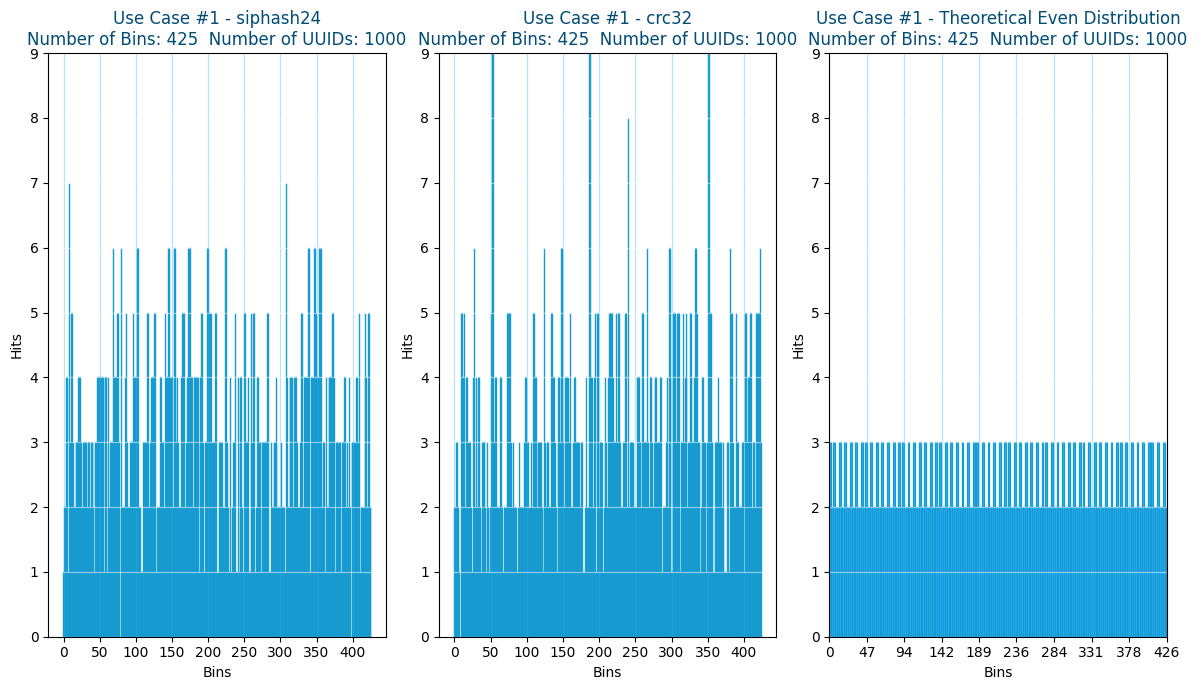

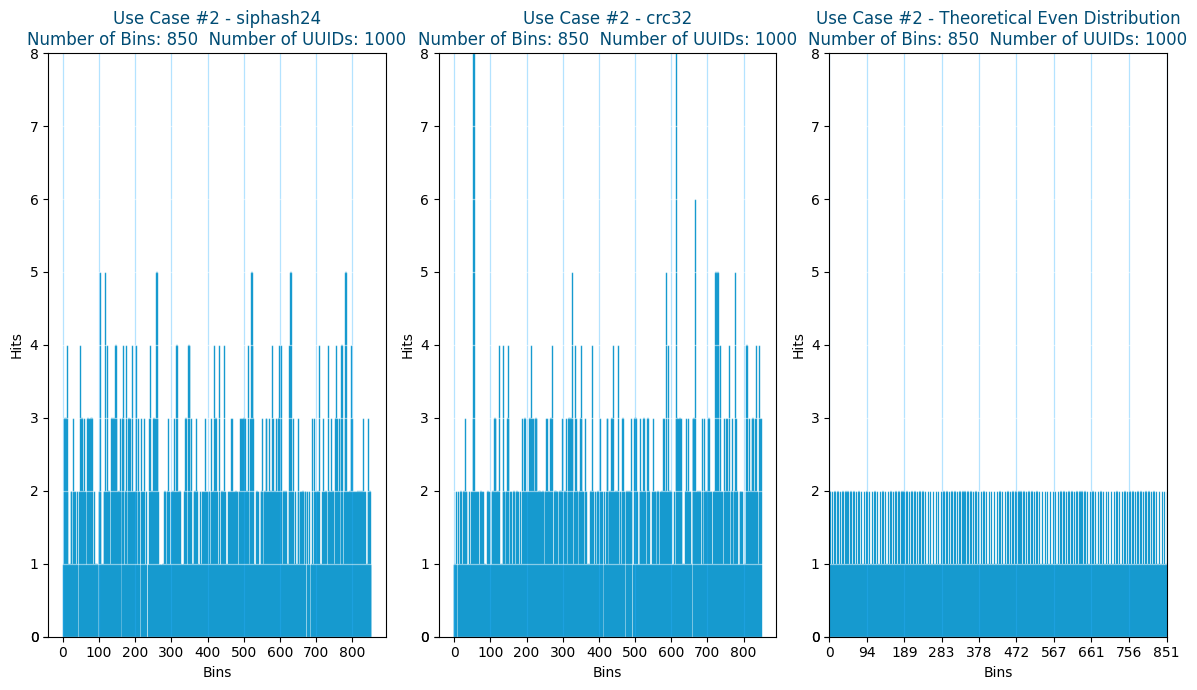

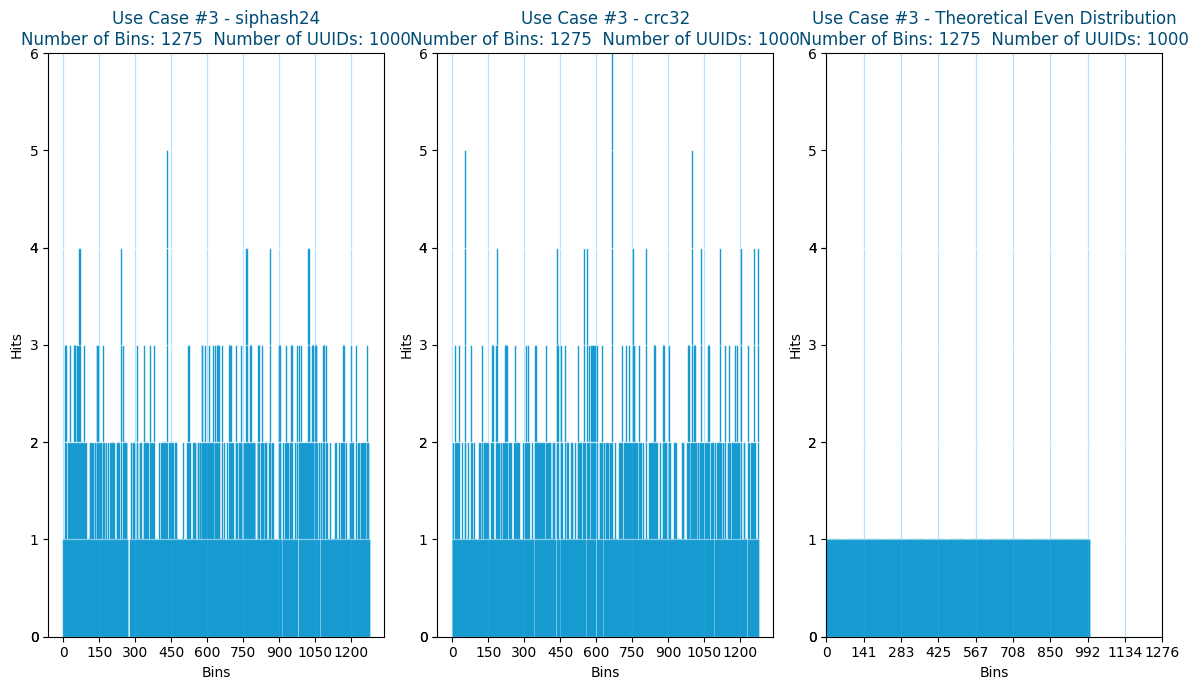

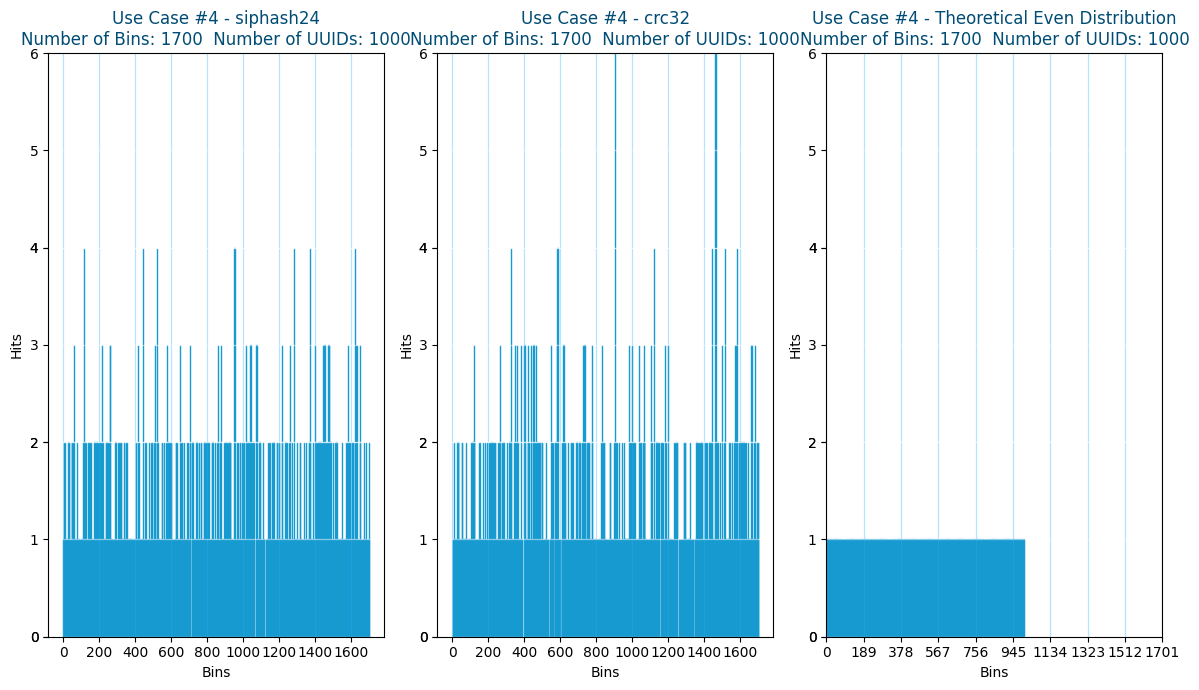

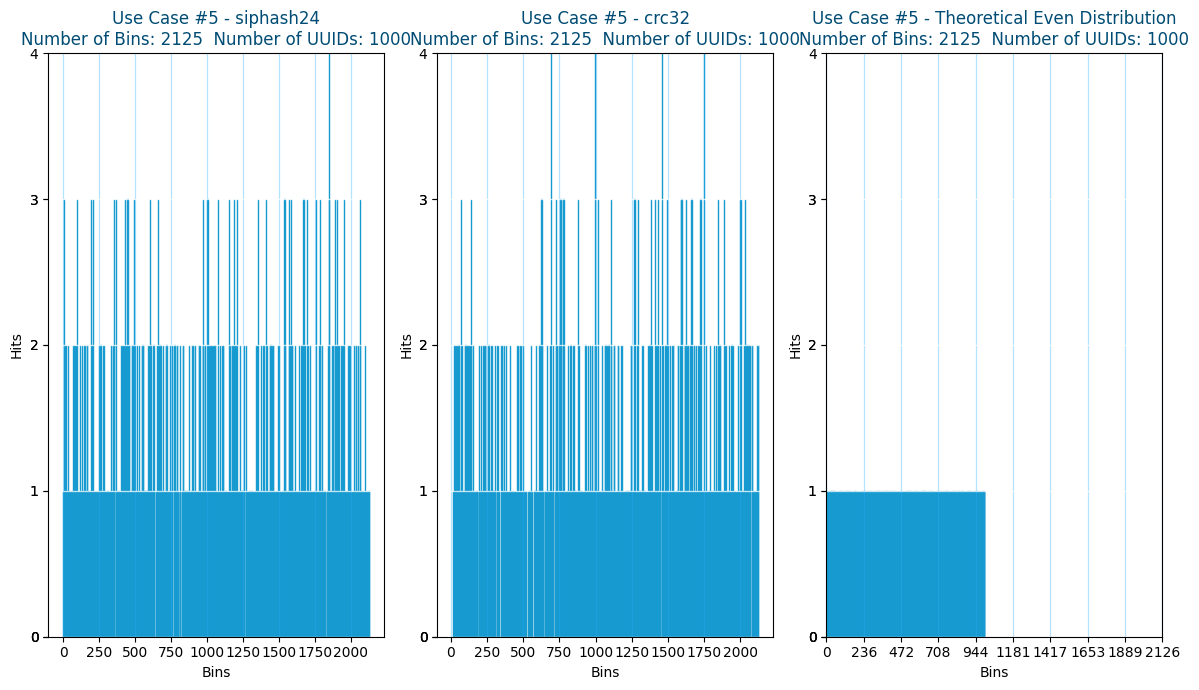

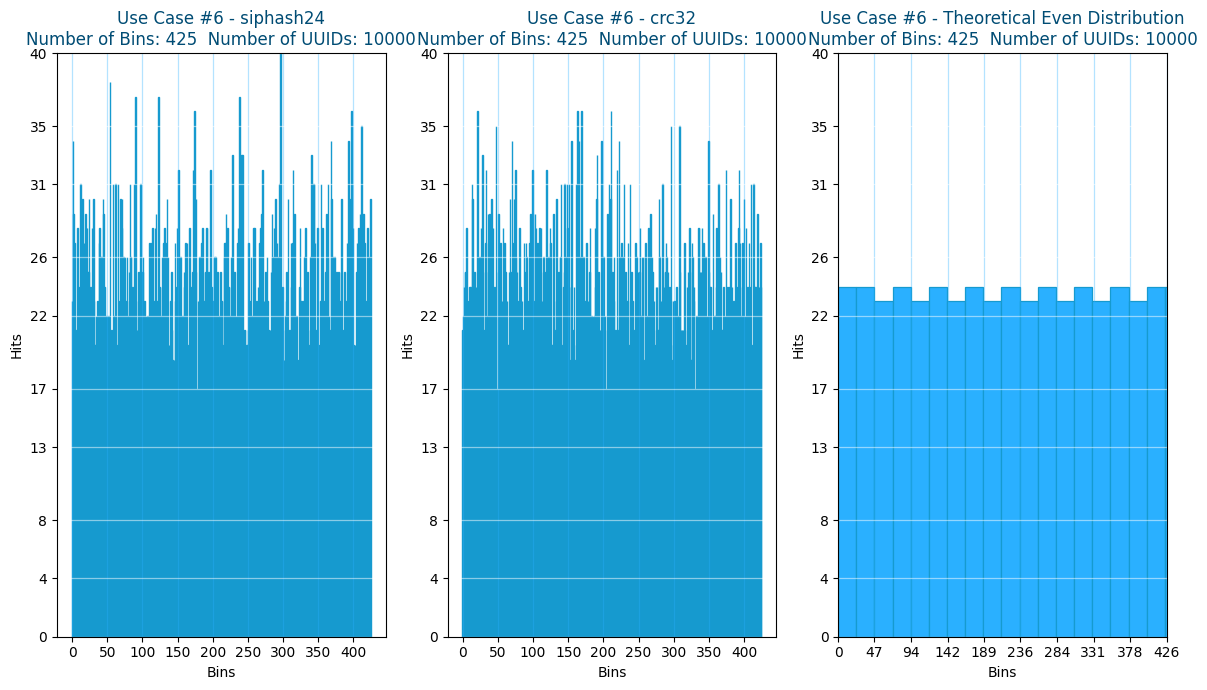

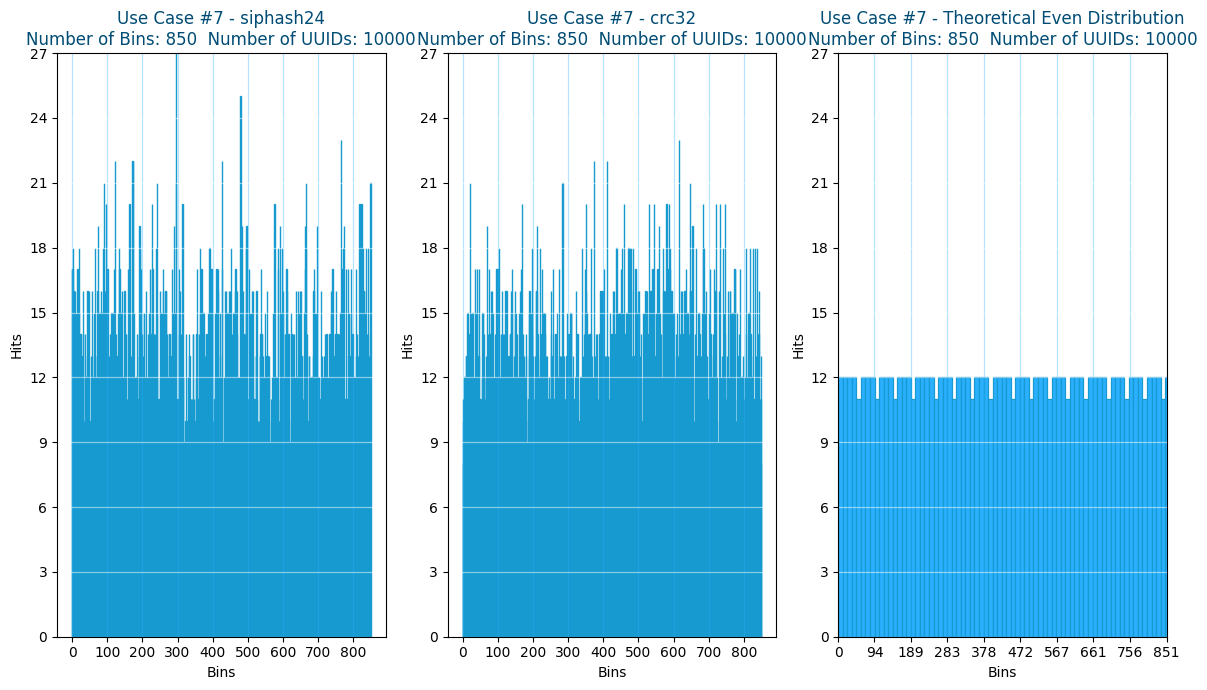

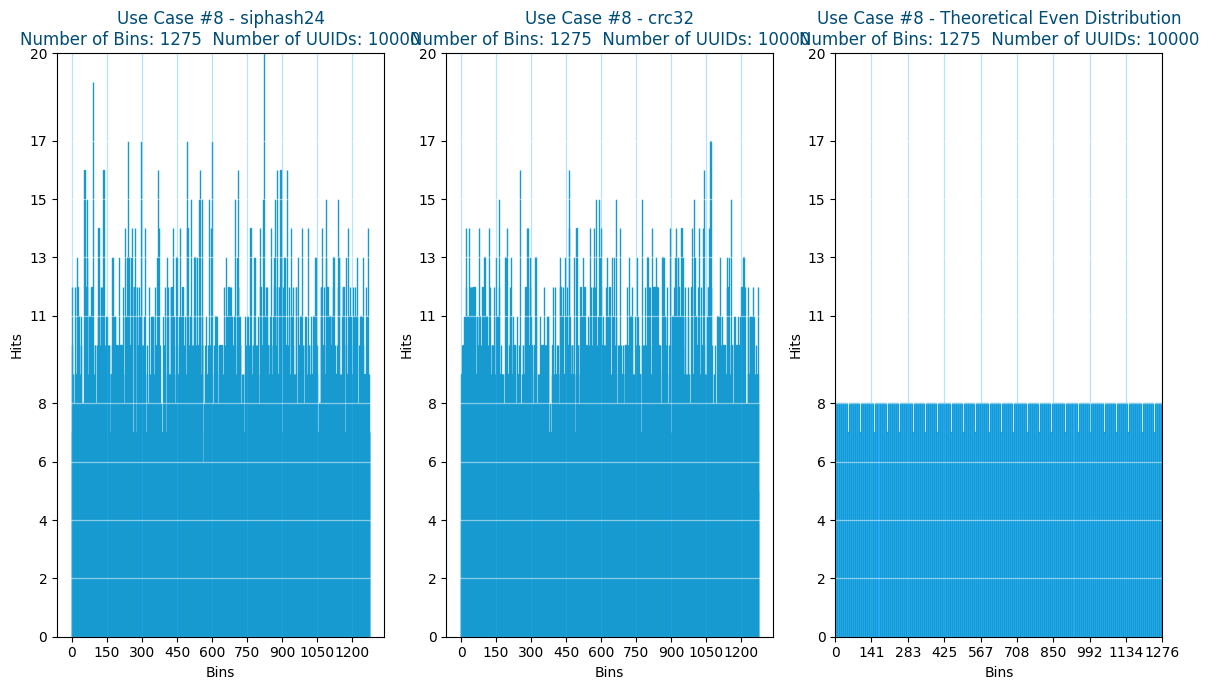

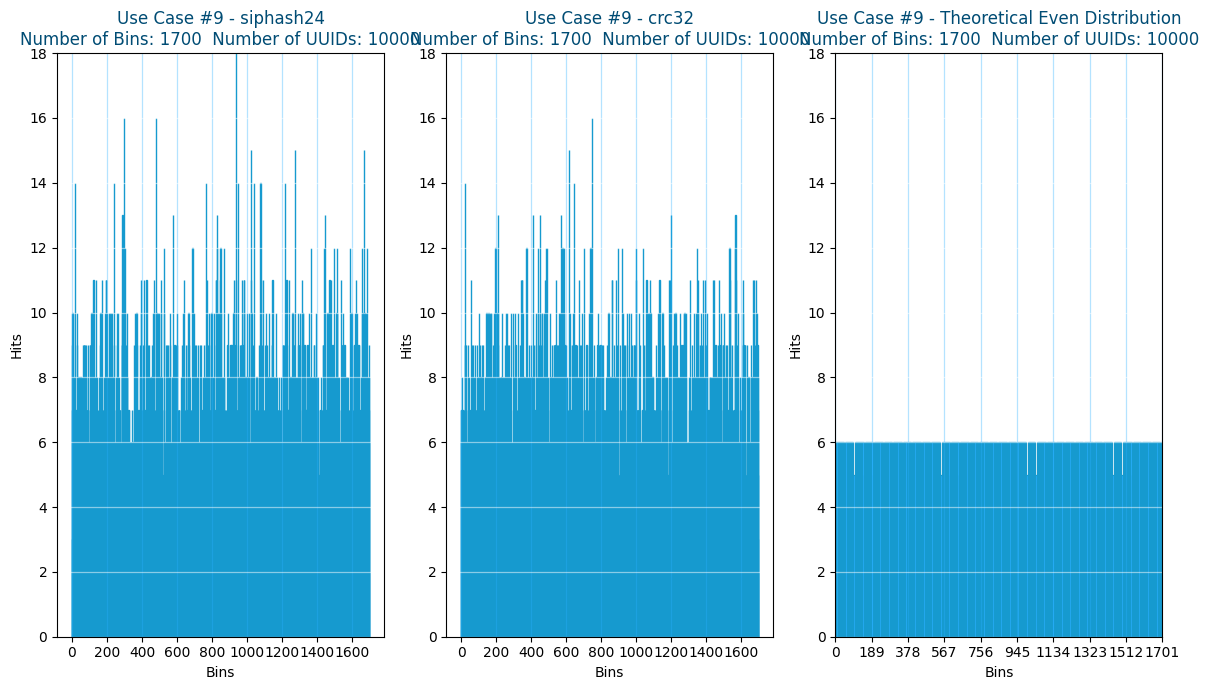

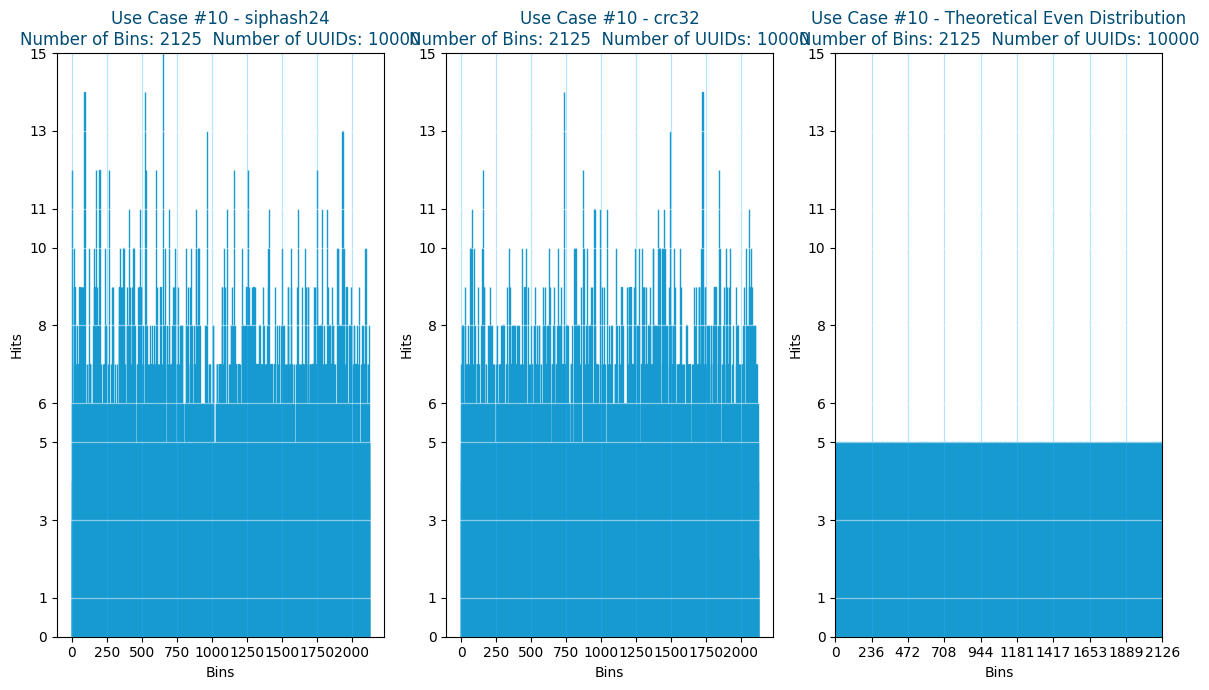

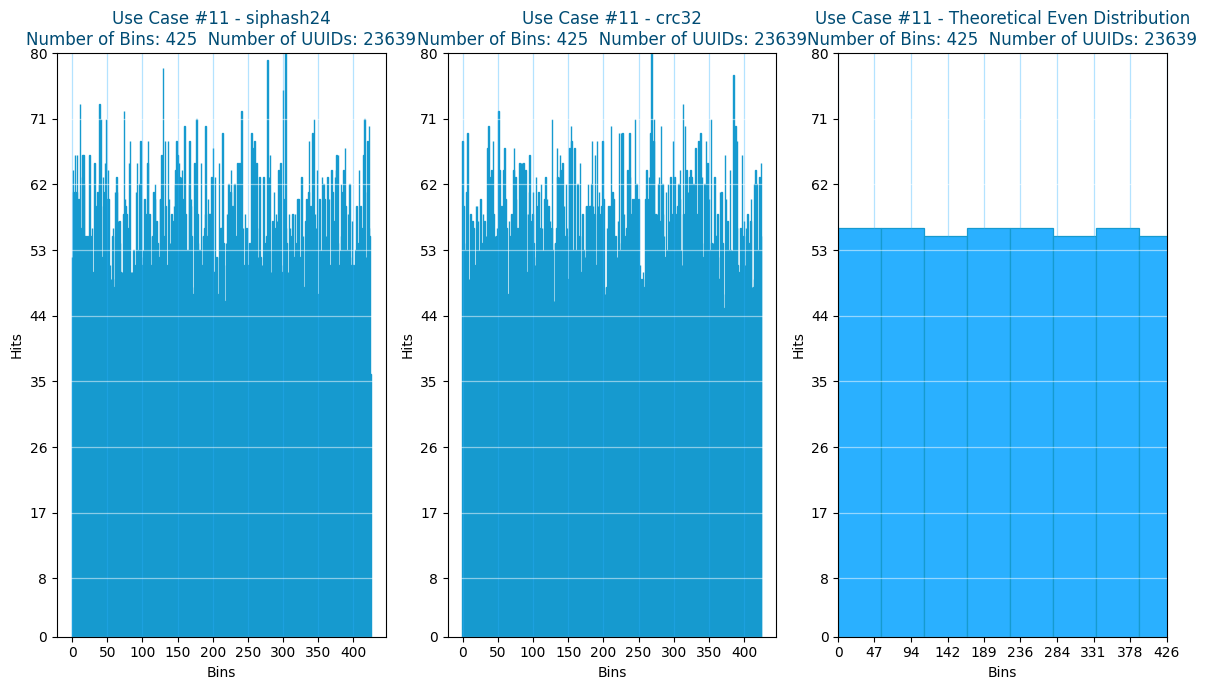

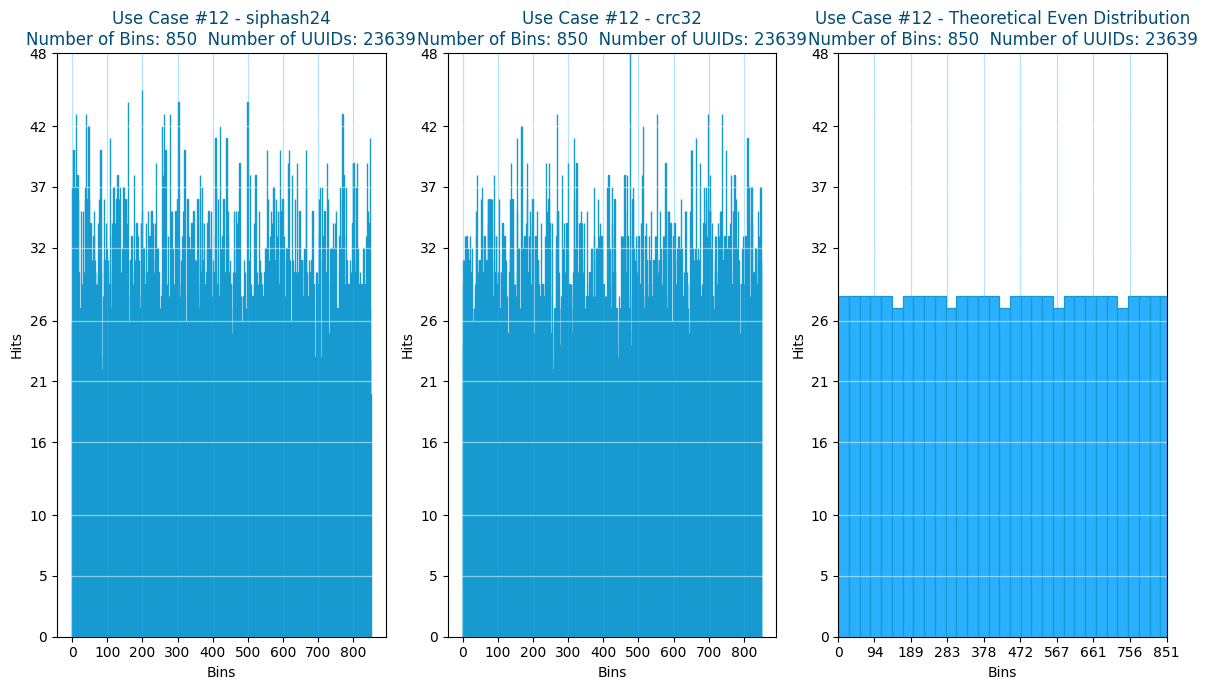

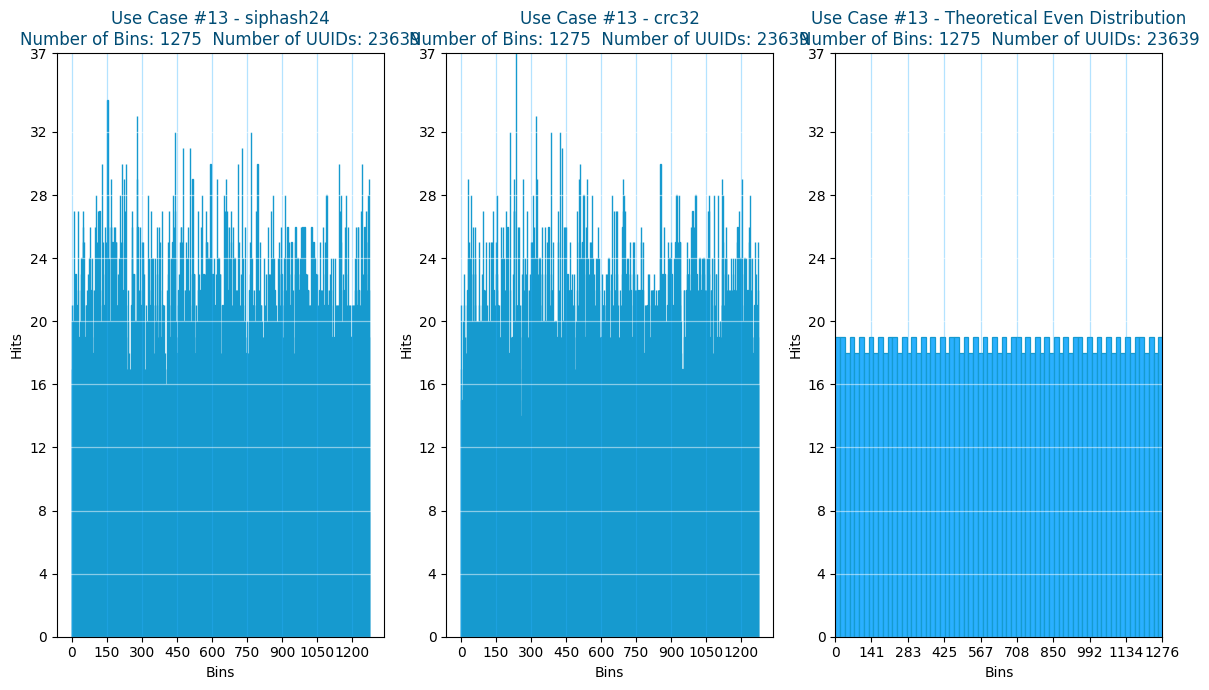

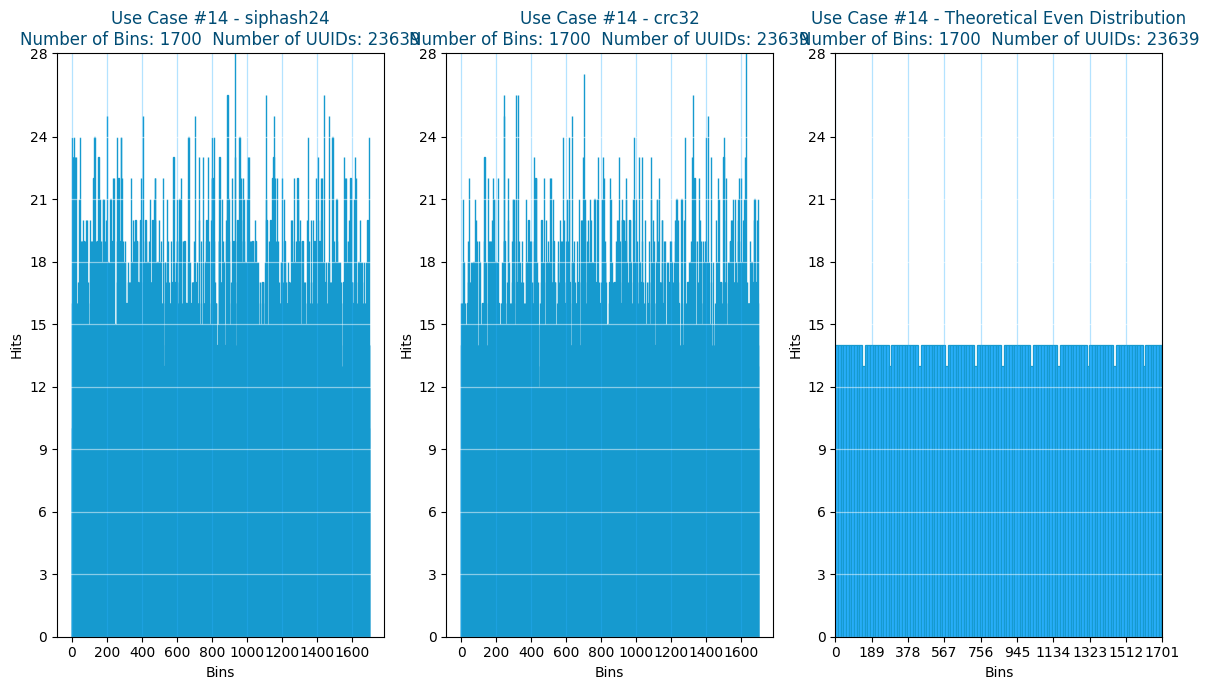

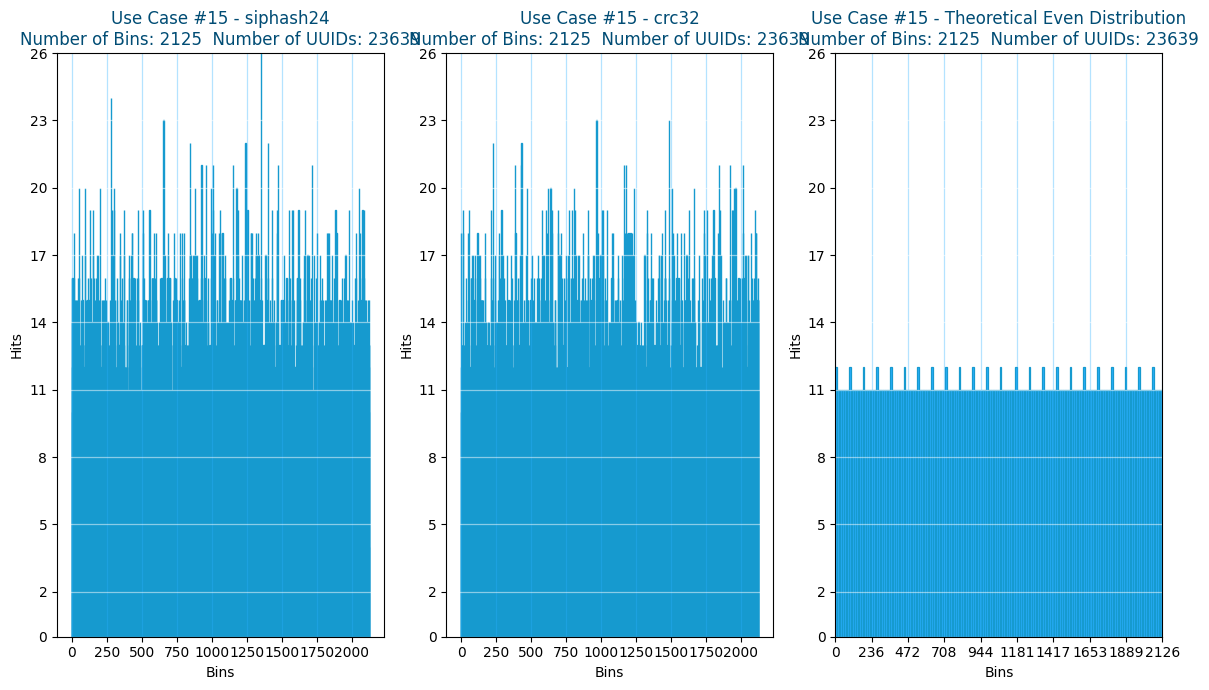

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

facecolor = '#2ab0ff'
edgecolor = '#169acf'
txt_color1 = '#252525'
txt_color2 = '#004C74'

# Demonstrate low user use case with charts
counter = 0
for val in test_cases:
    for bin_size in num_bins:
        counter+=1

        # Generate Counts with each hash function
        normal_hash_counts = (distribute(val, num_containers=bin_size))
        crc32_hash_counts = (distribute(val, num_containers=bin_size, hash_function=crc32_hash_function))

        # Generate Hex values for histogram
        uuids = [uuid.UUID(int=(int(i))) for i in val]  # Convert back to UUID
        hex_val = [(i.hex) for i in uuids]  # Convert to hexadecimal
        
        # Create 3 charts
        fig, axs = plt.subplots(1, 3, figsize=(12, 7), layout="tight")

        # Bar normal hash function
        axs[0].bar(normal_hash_counts.keys(), normal_hash_counts.values(), facecolor=facecolor, edgecolor=edgecolor)

        # Bar count hash function
        axs[1].bar(crc32_hash_counts.keys(), crc32_hash_counts.values(), facecolor=facecolor, edgecolor=edgecolor)

        # Histogram even distribution
        density, bins, _ = axs[2].hist(hex_val, bins=bin_size, facecolor=facecolor, edgecolor=edgecolor, lw=0.9)

        # Get max values from Collections
        def f_max(s): return max((c := (s)), key=c.get)
        normal_hash_max = normal_hash_counts[f_max(normal_hash_counts)]
        crc32_hash_max = crc32_hash_counts[f_max(crc32_hash_counts)]
        c_max = max(density)  # Normal max for array
        
        # Get global_max
        global_max = max([normal_hash_max, crc32_hash_max, c_max])

        # Change ax for all
        for ax in axs:
            ax.grid(axis='y', color='white', lw = 0.9, alpha=0.5)
            ax.grid(axis='x', color=facecolor, lw = 0.9, alpha=0.35)
            ax.grid(True)
            ax.set_ylabel('Hits')
            ax.set_ylim([0, global_max])
            ax.set_yticks(np.linspace(0, global_max, num=10, dtype=int))
            ax.set_xlabel("Bins")

        # Change ax for chart 1
        ax = axs[0]
        ax.set_title(get_title(sys.hash_info.algorithm, bin_size, len(val), counter), c=txt_color2)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Change ax for chart 2
        ax = axs[1]
        ax.set_title(get_title("crc32", bin_size, len(val), counter), c=txt_color2)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Change ax for chart 3
        ax = axs[2]
        ax.set_title(get_title("Theoretical Even Distribution", bin_size, len(val), counter), c=txt_color2)
        ax.set_xlim([0, bin_size])
        ax.set_xticks(np.linspace(0, len(bins), num=10, dtype=int))
        ax.set_xticklabels(np.linspace(0, bin_size+1, num=10, dtype=int))
        plt.show()

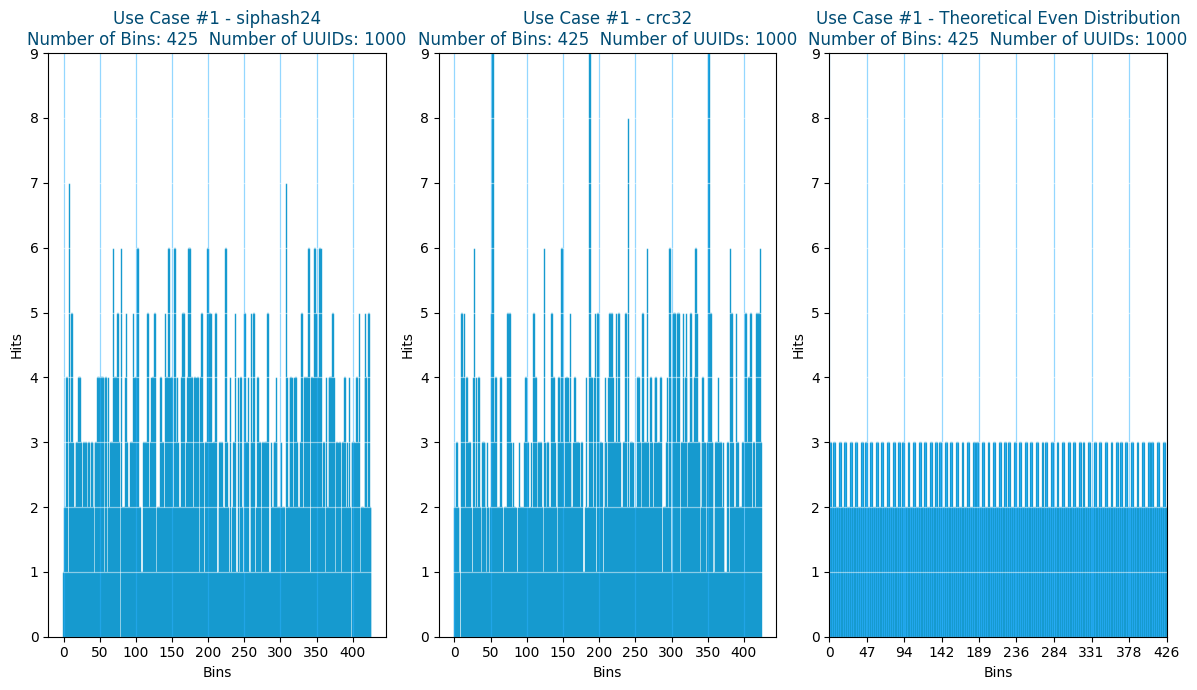

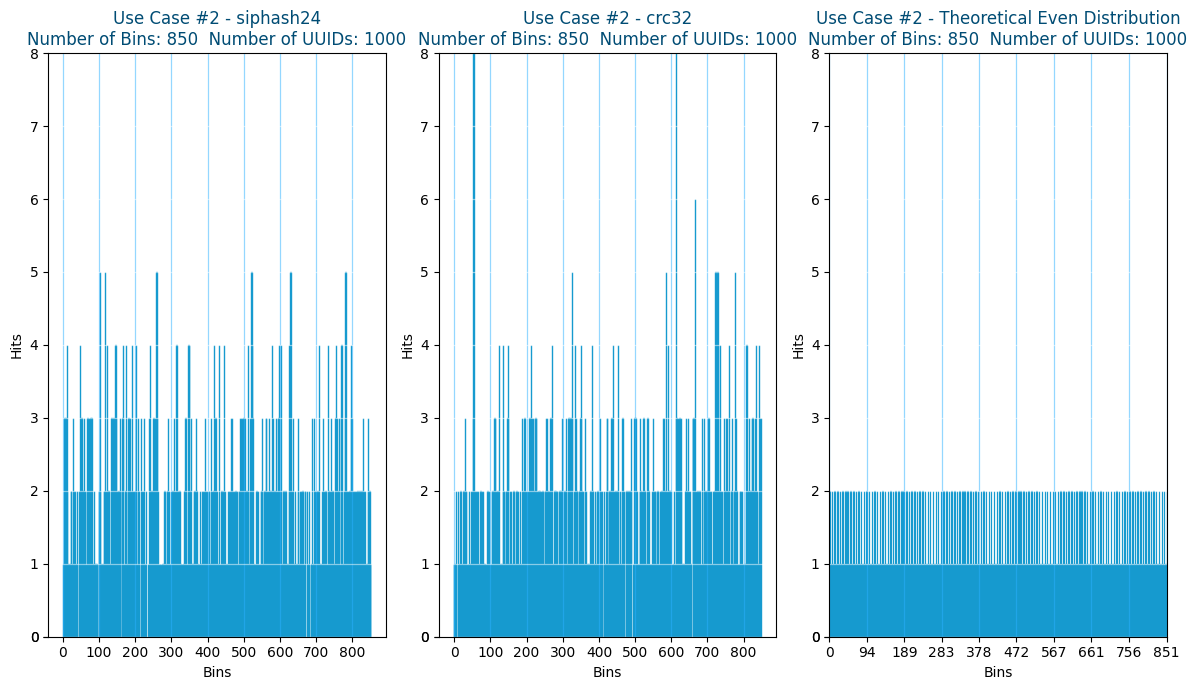

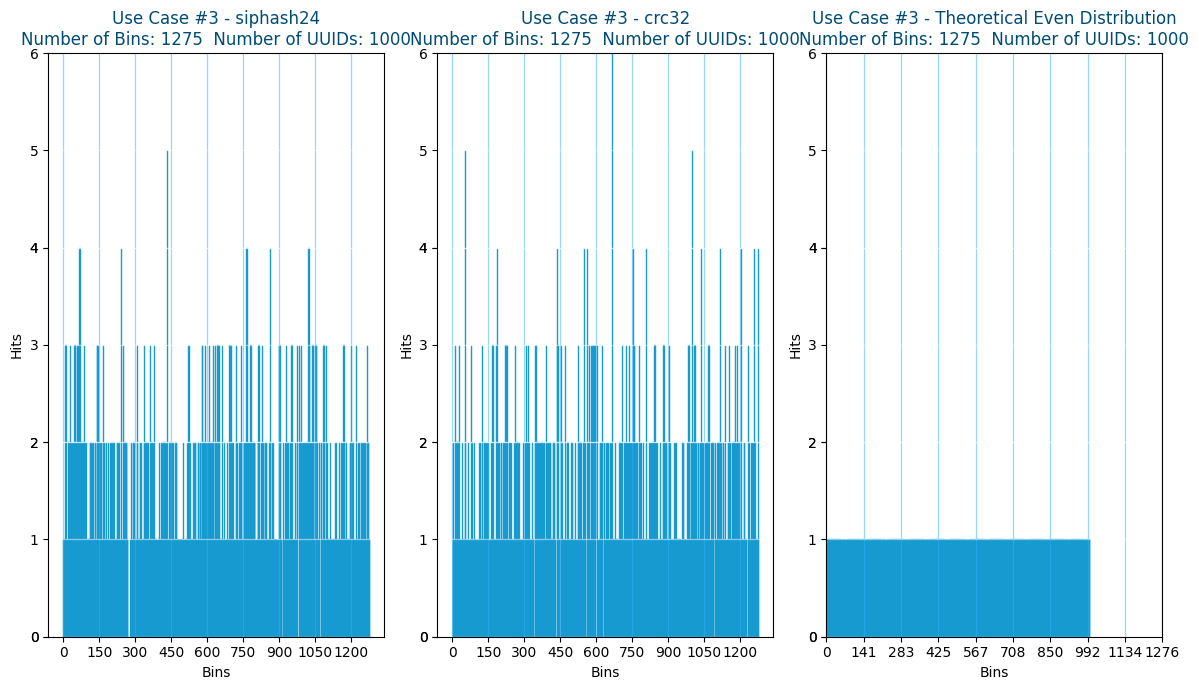

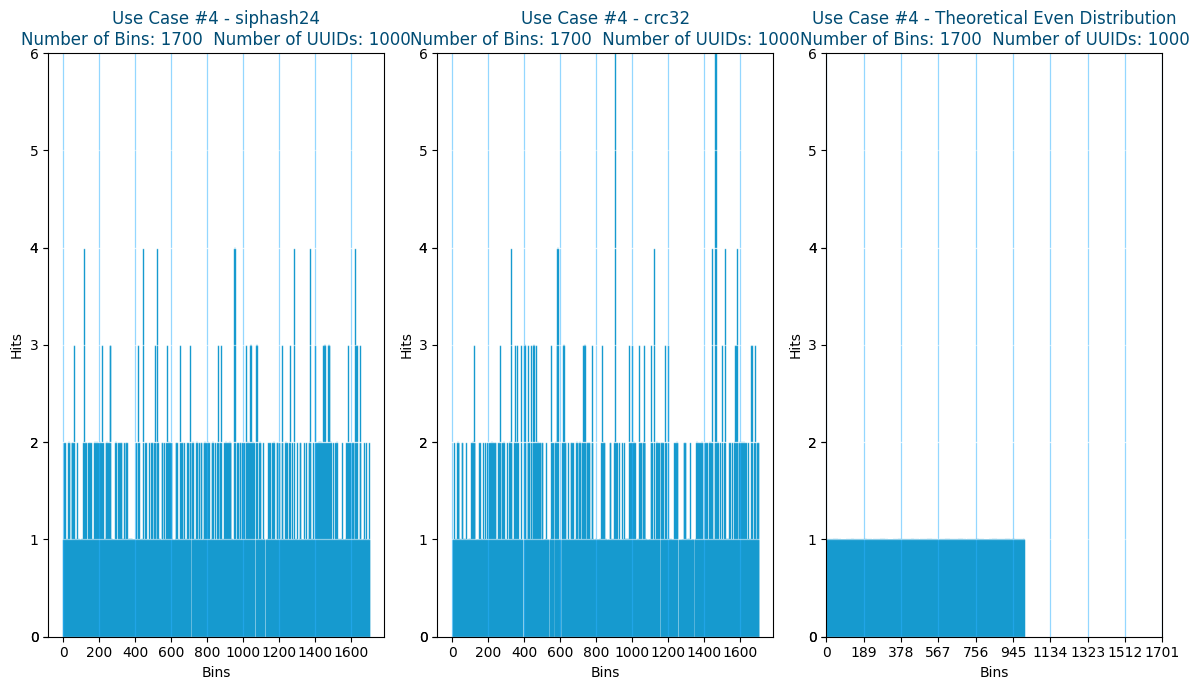

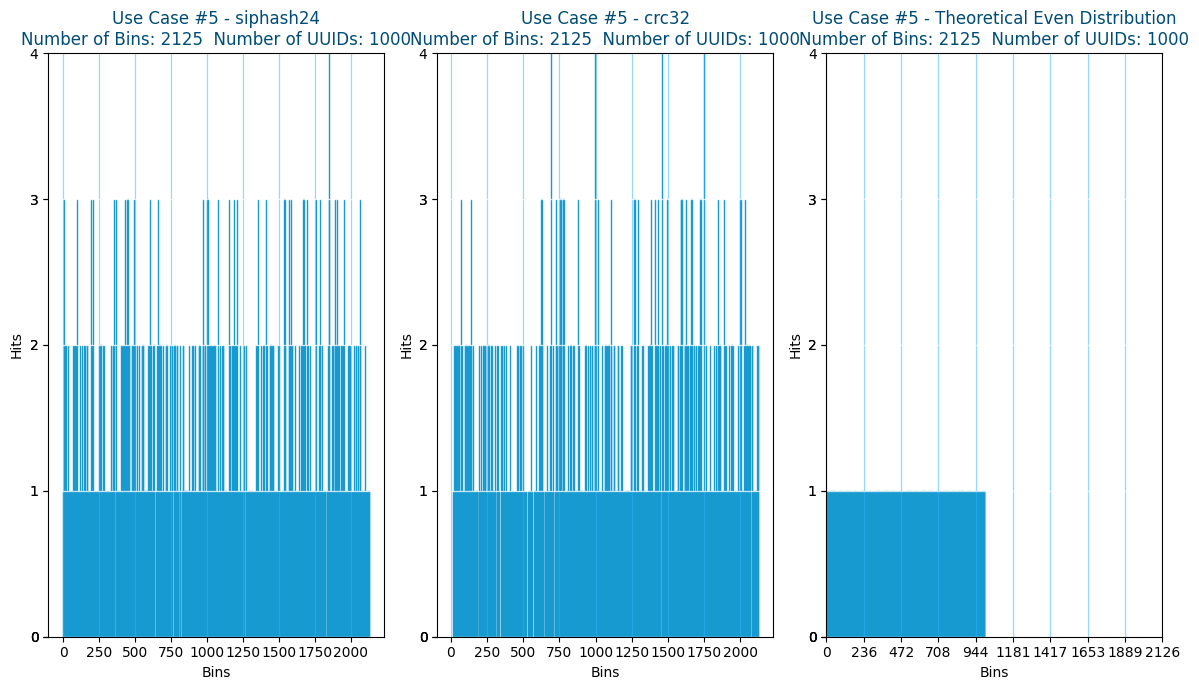

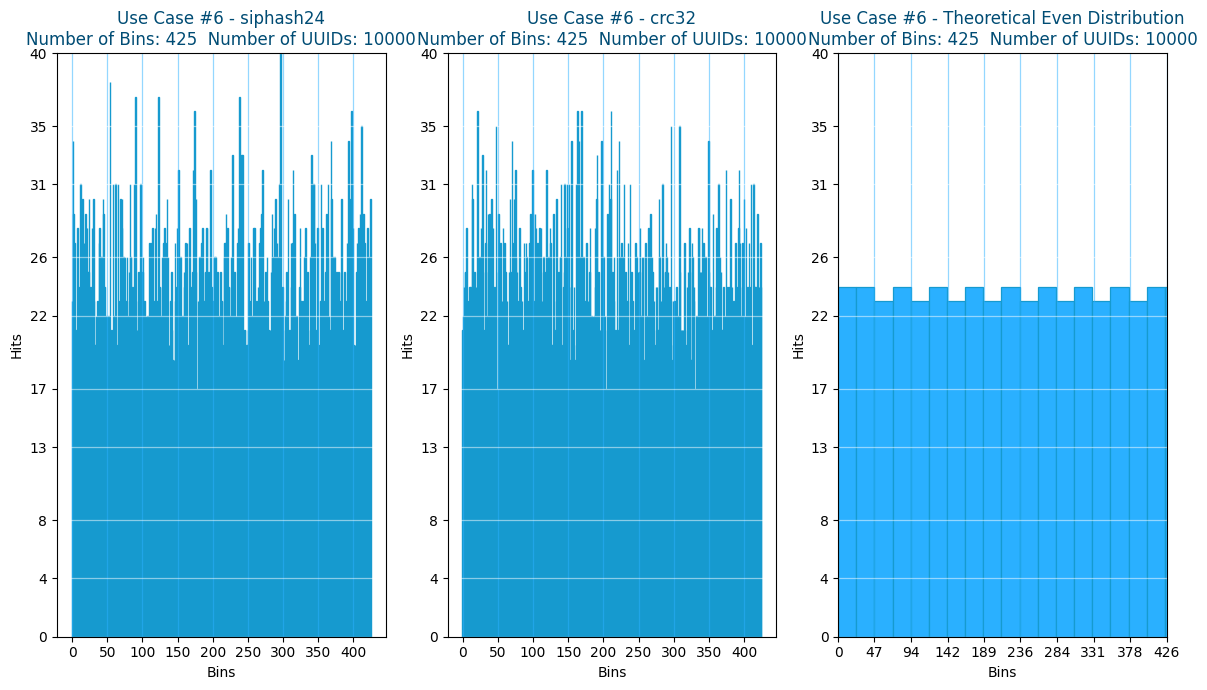

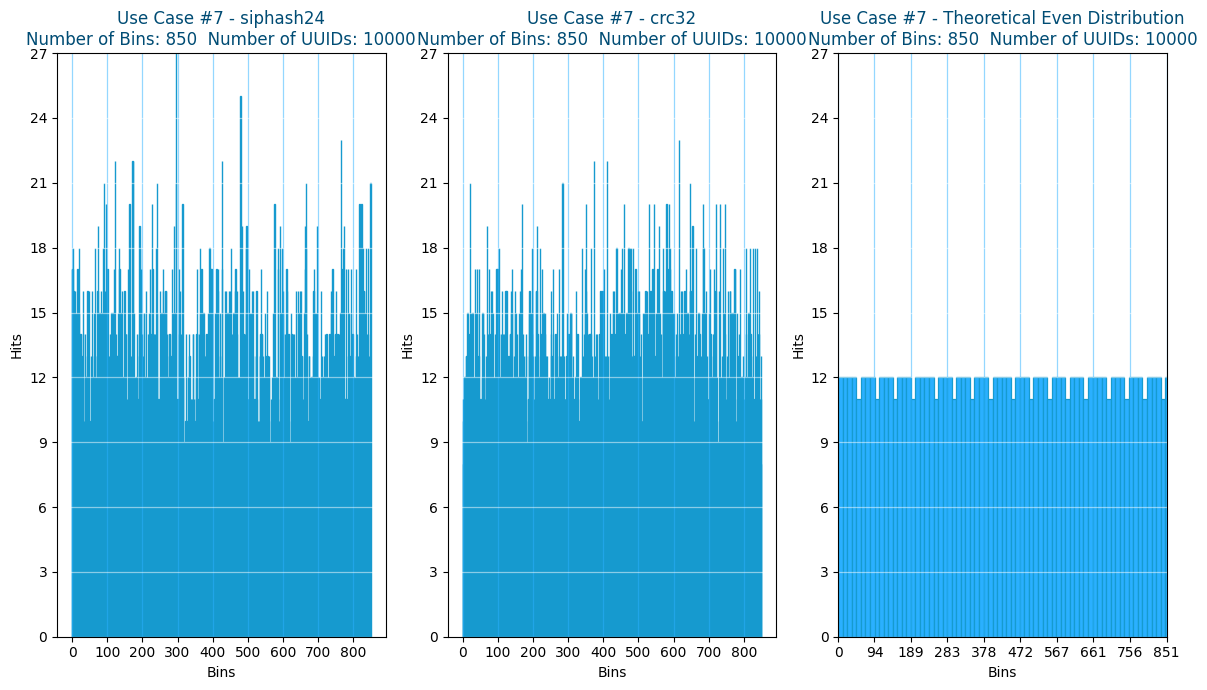

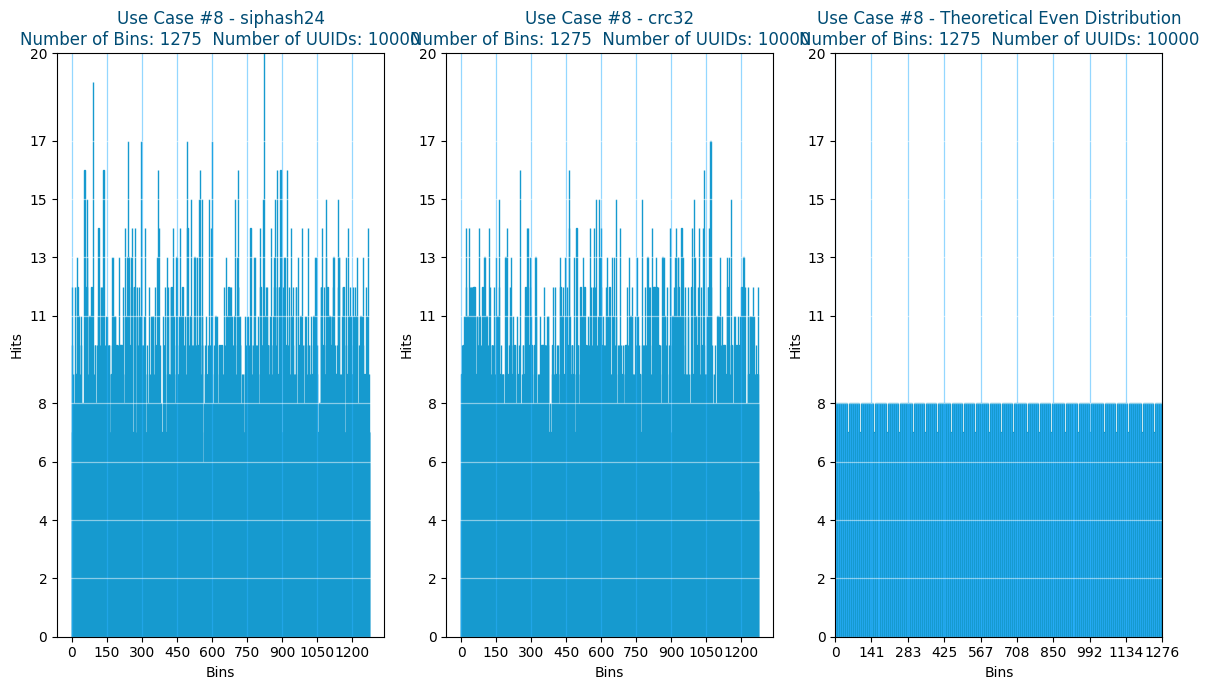

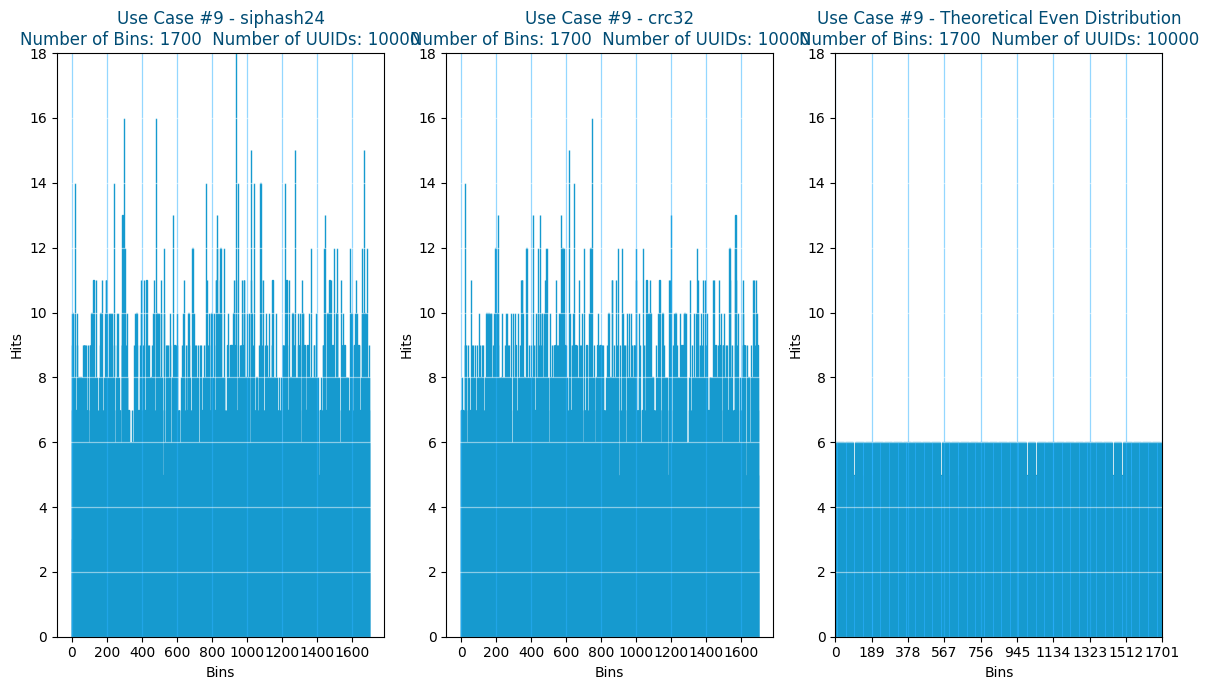

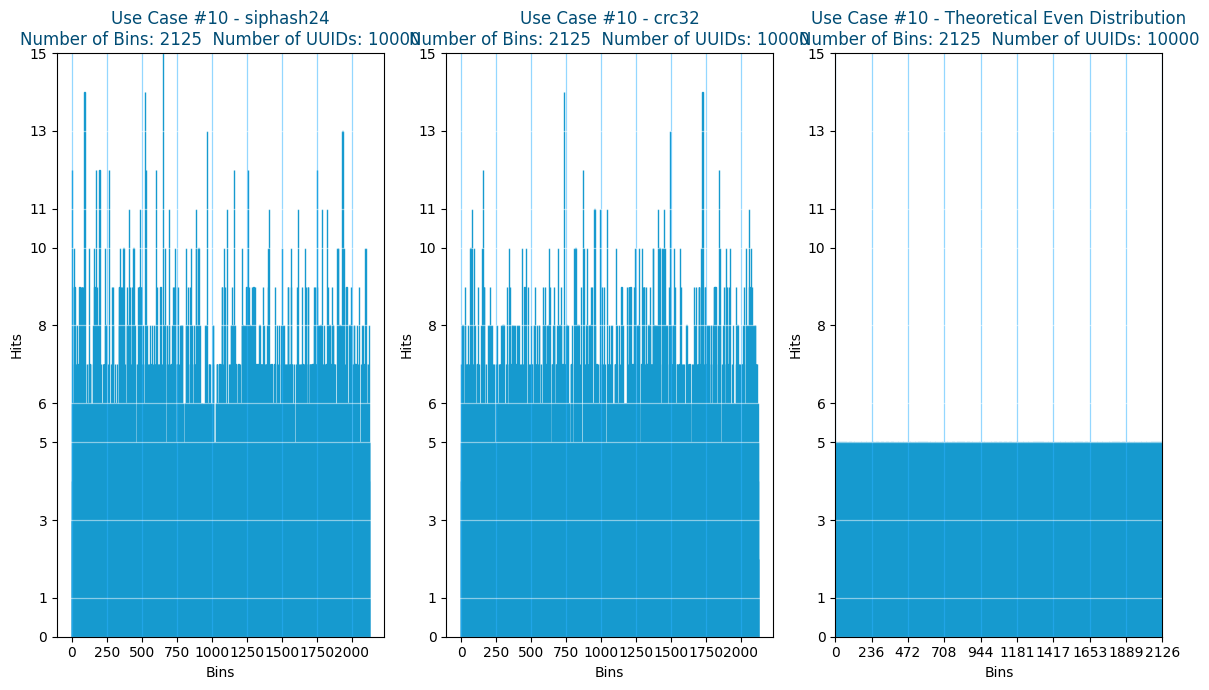

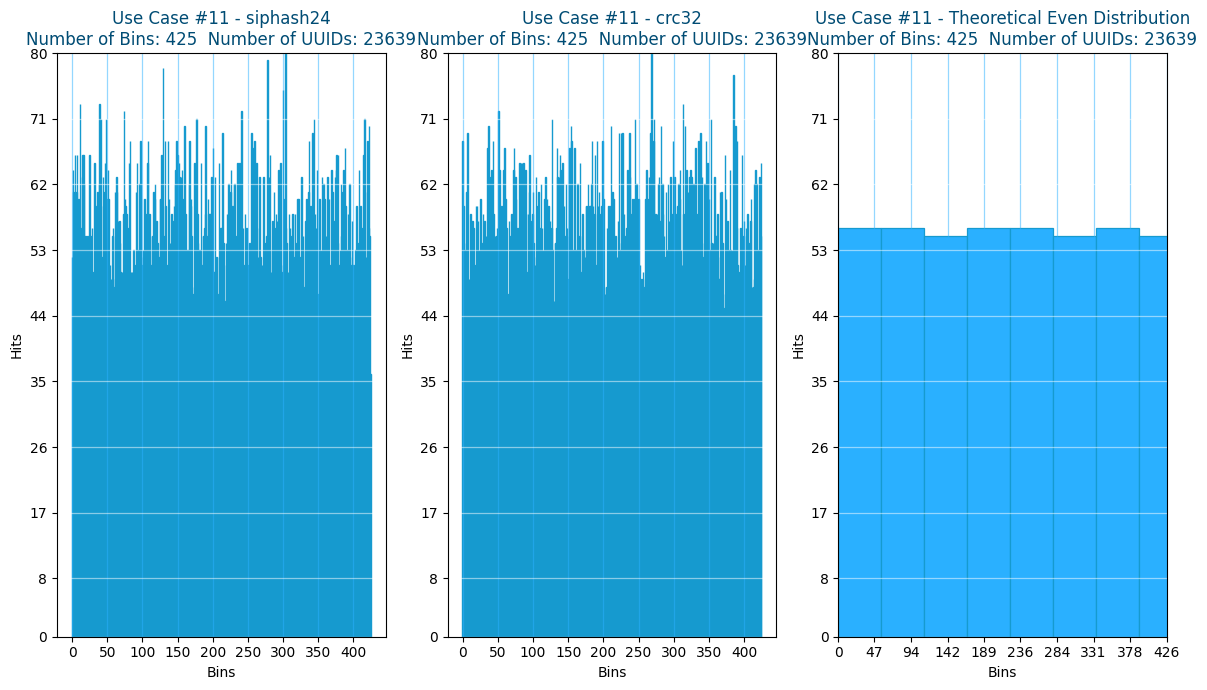

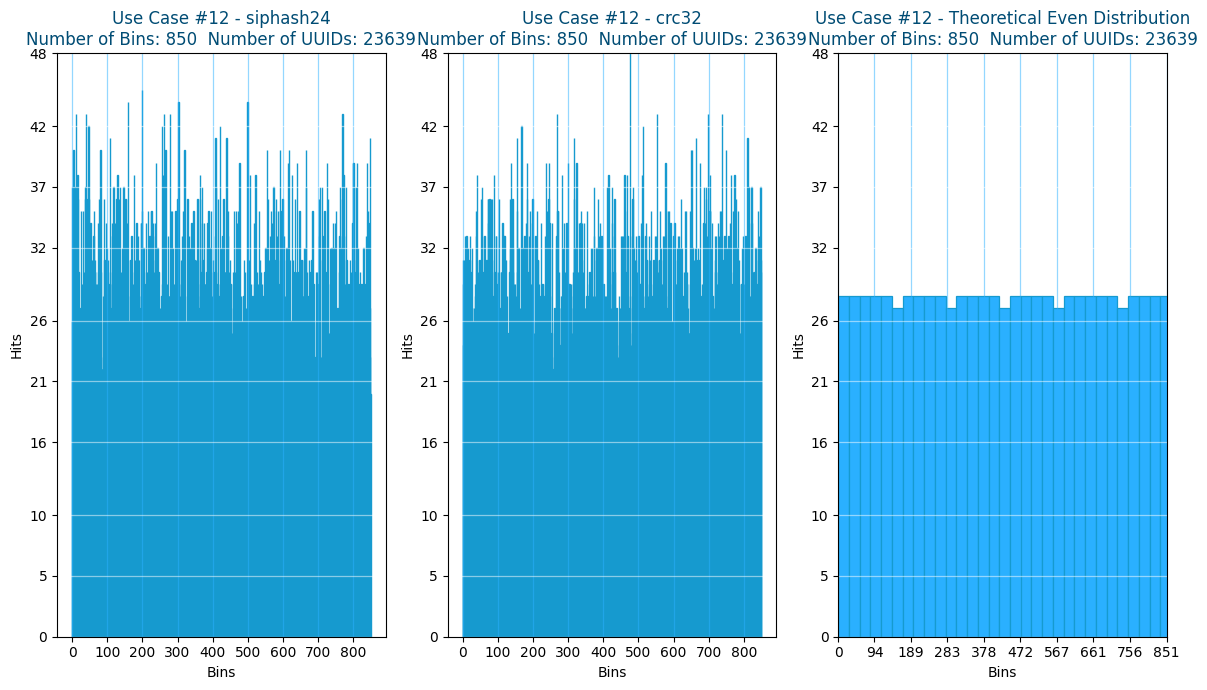

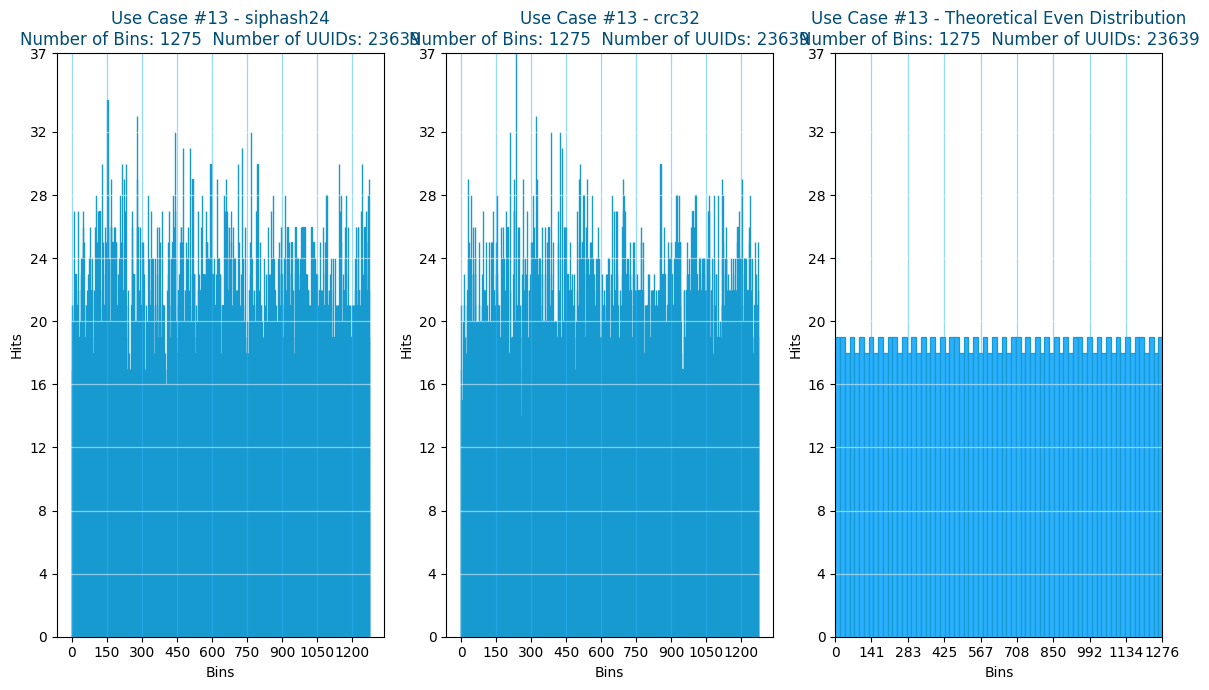

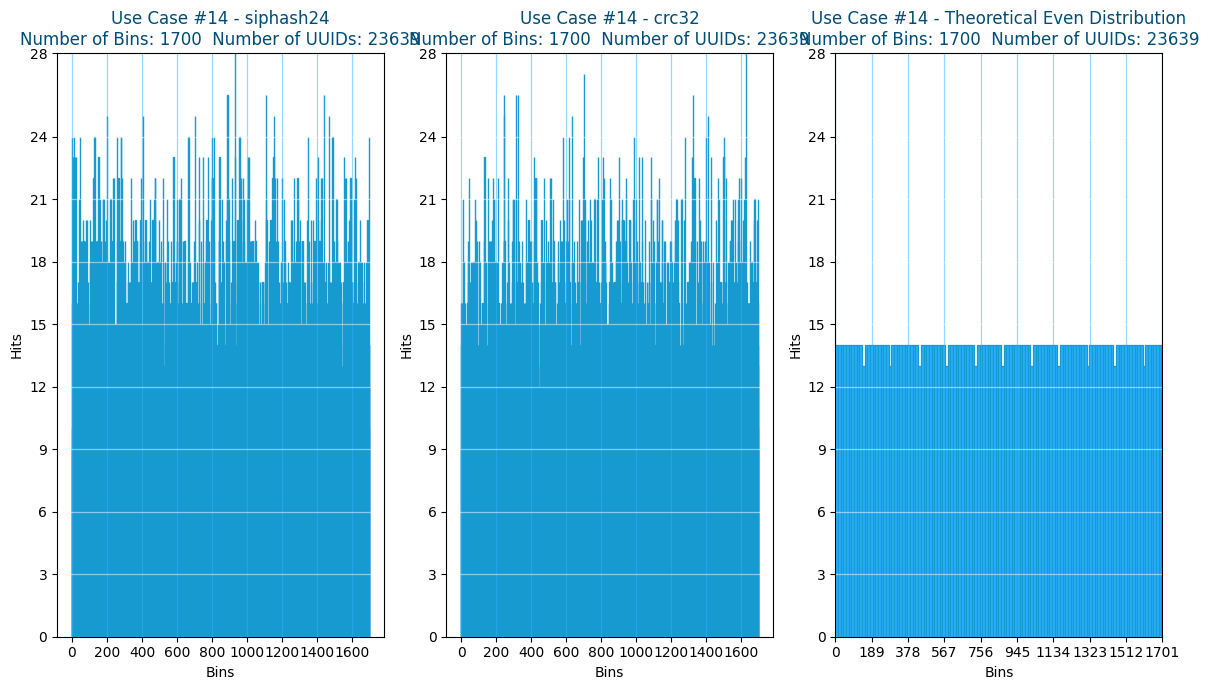

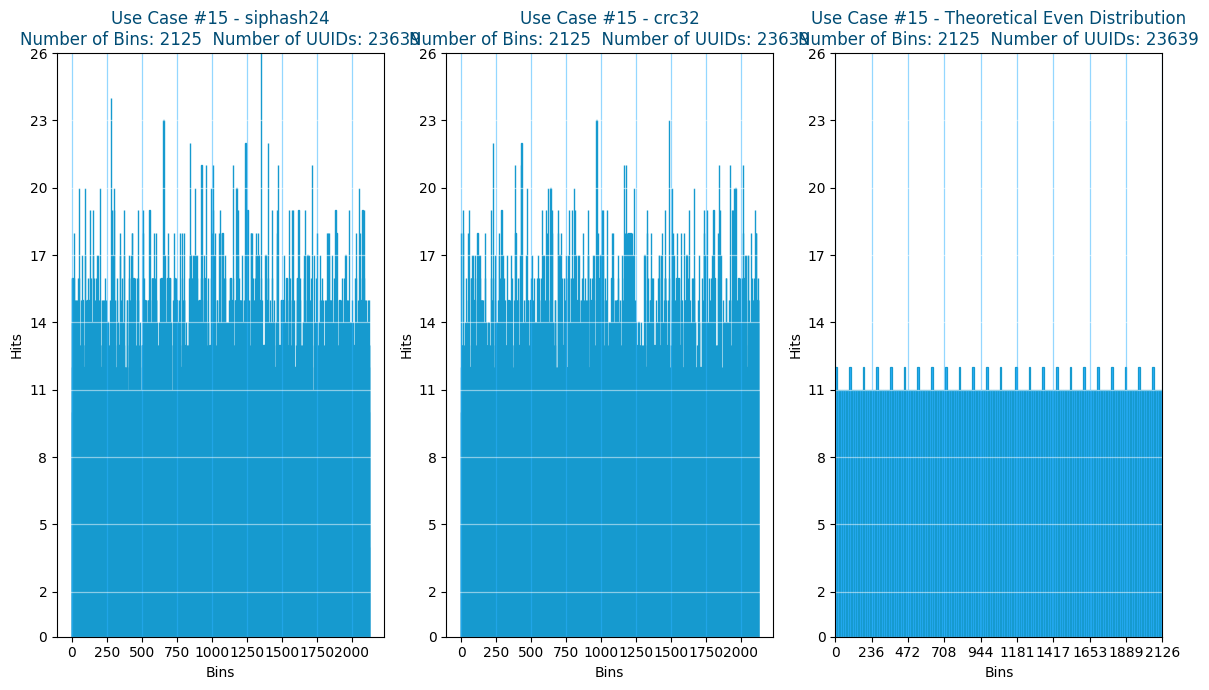

In [12]:
# Test fly-by users real life case
test_cases = [
    [str(uuid.uuid4().int) for i in range(1000)],   # 1k users
    [str(uuid.uuid4().int) for i in range(10000)],  # 10k users (client estimation)
    [str(uuid.uuid4().int) for i in range(23639)]   # 24k users (our estimation)
]

# 5% increments up to 25% of customer's MAUs
percent_incr = 0.5   # 5% increment
number_incr = 5      # 5 x 5% increments => 25%
customer_mau = 8500  # Monthly active users in 5% increments => [425, 850, 1275, 1700, 2125]
num_bins = [int((customer_mau *.10)*((i+1)*percent_incr)) for i in range(number_incr)]

# Demonstrate real-life user use case with charts
counter = 0
for val in test_cases:
    for bin_size in num_bins:
        counter+=1

        # Generate Counts with each hash function
        normal_hash_counts = (distribute(val, num_containers=bin_size))
        crc32_hash_counts = (distribute(val, num_containers=bin_size, hash_function=crc32_hash_function))

        # Generate Hex values for histogram
        uuids = [uuid.UUID(int=(int(i))) for i in val]  # Convert back to UUID
        hex_val = [(i.hex) for i in uuids]  # Convert to hexadecimal
        
        # Create 3 charts
        fig, axs = plt.subplots(1, 3, figsize=(12, 7), layout="tight")

        # Bar normal hash function
        axs[0].bar(normal_hash_counts.keys(), normal_hash_counts.values(), facecolor=facecolor, edgecolor=edgecolor)

        # Bar count hash function
        axs[1].bar(crc32_hash_counts.keys(), crc32_hash_counts.values(), facecolor=facecolor, edgecolor=edgecolor)

        # Histogram even distribution
        density, bins, _ = axs[2].hist(hex_val, bins=bin_size, facecolor=facecolor, edgecolor=edgecolor, lw=0.9)

        # Get max values from Collections
        def f_max(s): return max((c := (s)), key=c.get)
        normal_hash_max = normal_hash_counts[f_max(normal_hash_counts)]
        crc32_hash_max = crc32_hash_counts[f_max(crc32_hash_counts)]
        c_max = max(density)  # Normal max for array
        
        # Get global_max
        global_max = max([normal_hash_max, crc32_hash_max, c_max])

        # Change ax for all
        for ax in axs:
            ax.grid(axis='y', color='white', lw = 0.9, alpha=0.5)
            ax.grid(axis='x', color=facecolor, lw = 0.9, alpha=0.5)
            ax.grid(True)
            ax.set_ylabel('Hits')
            ax.set_ylim([0, global_max])
            ax.set_yticks(np.linspace(0, global_max, num=10, dtype=int))
            ax.set_xlabel("Bins")

        # Change ax for chart 1
        ax = axs[0]
        ax.set_title(get_title(sys.hash_info.algorithm, bin_size, len(val), counter), c=txt_color2)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Change ax for chart 2
        ax = axs[1]
        ax.set_title(get_title("crc32", bin_size, len(val), counter), c=txt_color2)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Change ax for chart 3
        ax = axs[2]
        ax.set_title(get_title("Theoretical Even Distribution", bin_size, len(val), counter), c=txt_color2)
        ax.set_xlim([0, bin_size])
        ax.set_xticks(np.linspace(0, len(bins), num=10, dtype=int))
        ax.set_xticklabels(np.linspace(0, bin_size+1, num=10, dtype=int))
        plt.show()